# Pengenalan

## 2020 annual CDC survey data of 400k adults related to their health status

Berisi data dari CDC (Centre for Disease Control and Prevention) di tahun 2020 terkait faktor yang bisa menjadi indikator apakah seseorang mengidap penyakit jantung atau tidak

Sumber data : https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

# Import library

In [25]:
# import package
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(["ggplot"])
import seaborn as sns

import sklearn.tree as tree
from six import StringIO 
import pydotplus 
from IPython.display import Image

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, classification_report

import pickle

# Data Loading & Explolatory Data Analysis



In [26]:
#Load data
data_heart=pd.read_csv('dataset//heart_2020_cleaned.csv')
data_heart.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [27]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [28]:
data_heart['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [29]:
data_heart['AgeCategory'].value_counts()           

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [30]:
for col in data_heart.columns:
    print(col, '\n', data_heart[col].unique(), '\n')

HeartDisease 
 ['No' 'Yes'] 

BMI 
 [16.6  20.34 26.58 ... 62.42 51.46 46.56] 

Smoking 
 ['Yes' 'No'] 

AlcoholDrinking 
 ['No' 'Yes'] 

Stroke 
 ['No' 'Yes'] 

PhysicalHealth 
 [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.] 

MentalHealth 
 [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.] 

DiffWalking 
 ['No' 'Yes'] 

Sex 
 ['Female' 'Male'] 

AgeCategory 
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race 
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic 
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity 
 ['Yes' 'No'] 

GenHealth 
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

SleepTime 
 [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22

In [31]:
obj1 = data_heart.select_dtypes(include = object).columns
obj1

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

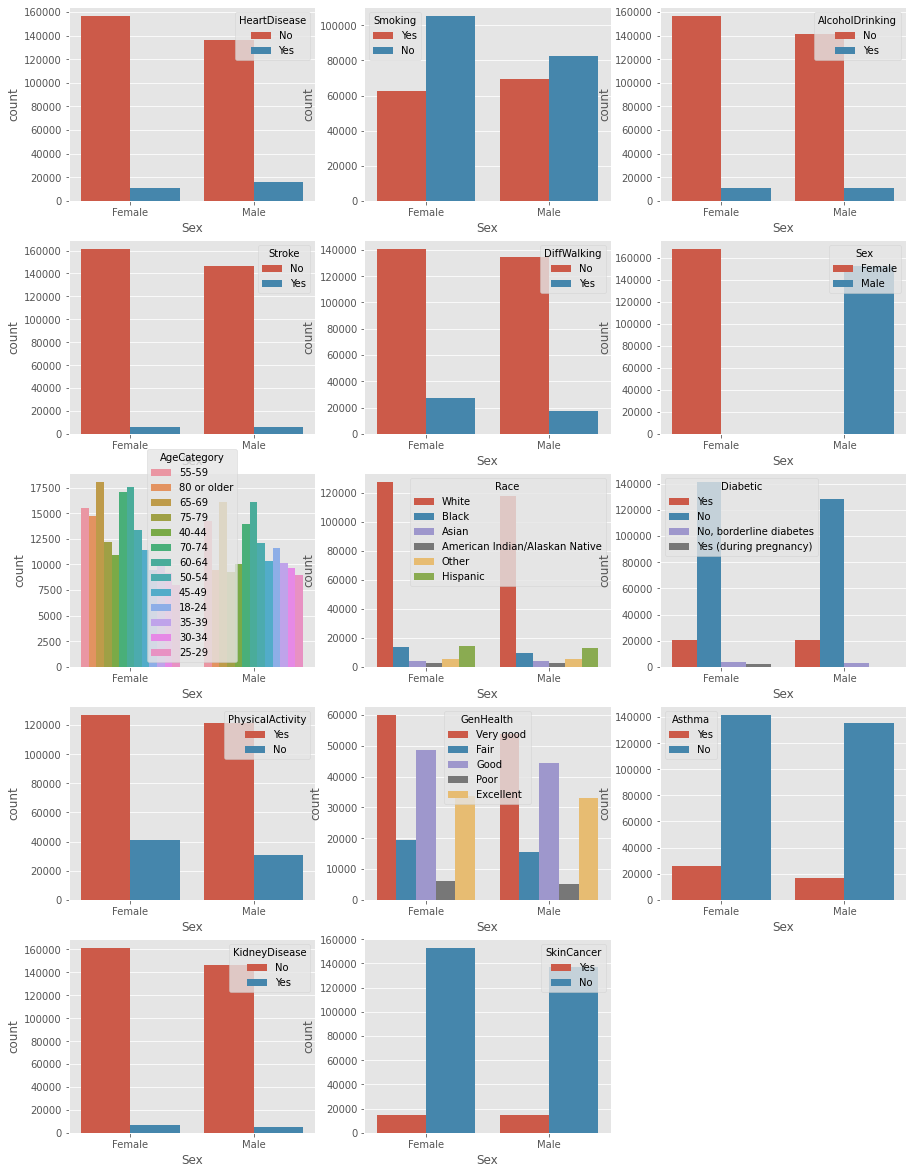

In [32]:
i = 1
plt.figure(figsize = (15,25))
for col in obj1:
    plt.subplot(6,3,i)
    sns.countplot(x = 'Sex',hue = data_heart[col] , data = data_heart)
    i +=1

# Data Preprocessing



In [42]:
#encoding

le= LabelEncoder()
df_heart_en =pd.DataFrame()
  
for col in data_heart.columns:
    if col not in ['BMI','PhysicalHealth','MentalHealth','SleepTime']:
        df_heart_en[col]= le.fit_transform(data_heart[col])
        print(col, le.classes_)

HeartDisease ['No' 'Yes']
Smoking ['No' 'Yes']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
Race ['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
Diabetic ['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
PhysicalActivity ['No' 'Yes']
GenHealth ['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
Asthma ['No' 'Yes']
KidneyDisease ['No' 'Yes']
SkinCancer ['No' 'Yes']


In [43]:
df_heart_en.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   HeartDisease      319795 non-null  int32
 1   Smoking           319795 non-null  int32
 2   AlcoholDrinking   319795 non-null  int32
 3   Stroke            319795 non-null  int32
 4   DiffWalking       319795 non-null  int32
 5   Sex               319795 non-null  int32
 6   AgeCategory       319795 non-null  int32
 7   Race              319795 non-null  int32
 8   Diabetic          319795 non-null  int32
 9   PhysicalActivity  319795 non-null  int32
 10  GenHealth         319795 non-null  int32
 11  Asthma            319795 non-null  int32
 12  KidneyDisease     319795 non-null  int32
 13  SkinCancer        319795 non-null  int32
dtypes: int32(14)
memory usage: 17.1 MB


In [44]:
df_feature = df_heart_en.drop(columns=["HeartDisease"])
df_target = df_heart_en["HeartDisease"]

df_target

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int32

In [45]:
#split data jadi training dfan testing data
#data testing 20% saja sisanya untuk training
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_target, random_state=0, test_size =0.2)

print(x_train.shape, x_test.shape)

(255836, 13) (63959, 13)


# Pendefinisian & Pelatihan Model



In [52]:
#buat model
#naive_bayes

model = GaussianNB().fit(x_train,y_train)

In [56]:
#Decision tree
# buat dan latih model
model_tree = DecisionTreeClassifier().fit(x_train, y_train)

# Evaluasi Model


In [47]:
#naive_bayes
y_pred = model.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#HeartDisease ['No' 'Yes']
#No = 0
#Yes = 1

              precision    recall  f1-score   support

           0       0.94      0.90      0.92     58512
           1       0.28      0.41      0.33      5447

    accuracy                           0.86     63959
   macro avg       0.61      0.66      0.63     63959
weighted avg       0.89      0.86      0.87     63959

[[52898  5614]
 [ 3222  2225]]


In [57]:
#Decision tree

y_pred = model_tree.predict(x_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58512
           1       0.37      0.12      0.18      5447

    accuracy                           0.91     63959
   macro avg       0.65      0.55      0.57     63959
weighted avg       0.88      0.91      0.89     63959

[[57404  1108]
 [ 4785   662]]


In [ ]:
#visualisasi Decision Tree
dot_data = StringIO()
tree.export_graphviz(model_tree, 
        out_file=dot_data, 
        class_names=['No','Yes'], # the target names. 
        feature_names=['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], # the feature names. 
        filled=True, # Whether to fill in the boxes with colours. 
        rounded=True, # Whether to round the corners of the boxes. 
        special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Model Saving



In [55]:
#naive_bayes
pickle.dump(model, open("model_nb.pkl",'wb'))

#random forest
pickle.dump(model_forest, open("model_nb.pkl",'wb'))

# Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.


HeartDisease 
 ['No' 'Yes'] 

Smoking 
 ['Yes' 'No'] 

AlcoholDrinking 
 ['No' 'Yes'] 

Stroke 
 ['No' 'Yes'] 

DiffWalking 
 ['No' 'Yes'] 

Sex 
 ['Female' 'Male'] 

AgeCategory 
 ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29'] 

Race 
 ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic'] 

Diabetic 
 ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)'] 

PhysicalActivity 
 ['Yes' 'No'] 

GenHealth 
 ['Very good' 'Fair' 'Good' 'Poor' 'Excellent'] 

Asthma 
 ['Yes' 'No'] 

KidneyDisease 
 ['No' 'Yes'] 

SkinCancer 
 ['Yes' 'No'] 




In [49]:
#Data test
# Smoking = yes / 0
# Alkohol = yes / 1
# stroke = no / 0
# DiffWalking = Yes / 1
# Sex Male / 1
# AgeCategory 30-34 / 11
# Races Asian / 2
# Diabetic No / 1
# PhysicalActivity Yes / 0
# GenHealth Fair / 1
# Asthma No / 1
# KidneyDisease No / 0
# SkinCancer No / 1

model.predict([[ 0 , 1 , 0 , 1 , 1 , 11 , 2 , 1 , 0 , 1 , 1 , 0 , 1 ]])

C:\Users\Oscar Forendo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

# Kesimpulan

Teknik klasifikasi pertama yang digunakan adalah Naive Bayes karena memiliki akurasi dan kecepatan tinggi pada kumpulan data besar. Namun terlihat dari data yang digunakan kurang seimbang antara kategori HeartDisease 'yes' dan 'no' yang berpengaruh terhadap hasil prediksi dari model , terutama untuk kategori 'no' yang jumlah datanya jauh lebih sedikit

Teknik klasifikasi yang juga dicoba adalah Decision Tree, untuk membandingkan hasil prediksi dari Naive Bayes. Namun ternyata perbedaan hasil akurasinya tidak terlalu signifikan. Decision tree menghasilkan perbandingan sedikit lebih seimbang antara kedua target.